In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df=pd.read_csv("all-data.csv", encoding='latin-1')

In [35]:
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [6]:
df2=pd.read_csv('IndianFinancialNews.csv')

In [7]:
df2

,Unnamed: 0,Date,Title,Description
0,0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,..."
1,1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."
2,2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
3,3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
4,4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...
...,...,...,...,...
49995,49995,"February 11, 2003, Tuesday",Lic Mops Up Government Securities As Prices Crash,Lic Mops Up Government Securities As Prices Crash
49996,49996,"February 11, 2003, Tuesday",Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...
49997,49997,"February 10, 2003, Monday","Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore"
49998,49998,"February 10, 2003, Monday",Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits


In [36]:
df=df.rename(columns={
    'neutral':'sentiment',
    'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'news'
})

In [37]:
df.head()

,sentiment,news
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [13]:
df['sentiment'].value_counts()

neutral     2878
positive    1363
negative     604
Name: sentiment, dtype: int64

In [19]:
df3=pd.read_csv('News_sentiment_Jan2017_to_Apr2021.csv')

In [32]:
df3=df3.drop('Unnamed: 5',axis=1)

In [33]:
df3

,Date,Title,URL,sentiment,confidence
0,05/01/17,Eliminating shadow economy to have positive im...,http://economictimes.indiatimes.com/news/econo...,POSITIVE,0.996185
1,05/01/17,Two Chinese companies hit roadblock with India...,http://economictimes.indiatimes.com/news/econo...,NEGATIVE,-0.955493
2,05/01/17,SoftBank India Vision gets new $100,http://economictimes.indiatimes.com/small-biz/...,POSITIVE,0.595612
3,05/01/17,Nissan halts joint development of luxury cars ...,http://economictimes.indiatimes.com/news/inter...,NEGATIVE,-0.996672
4,05/01/17,Despite challenges Rajasthan continues to prog...,http://economictimes.indiatimes.com/news/polit...,POSITIVE,0.997388
...,...,...,...,...,...
200495,12/04/21,"Realme 8 5G launch date announced , specificat...",https://www.businesstoday.in/technology/realme...,POSITIVE,0.996252
200496,11/04/21,"Bitcoin resurges beyond $60 , 000 over reports...",https://www.businesstoday.in/markets/commoditi...,NEGATIVE,-0.994247
200497,11/04/21,FPIs withdraw Rs 929 cr from Indian markets so...,https://www.businesstoday.in/current/economy-p...,NEGATIVE,-0.998080
200498,11/04/21,"Google confirms Pixel 5a 5G is not cancelled ,...",https://www.businesstoday.in/technology/google...,POSITIVE,0.844368


### Need to extract article from given URL

<AxesSubplot: xlabel='count', ylabel='sentiment'>

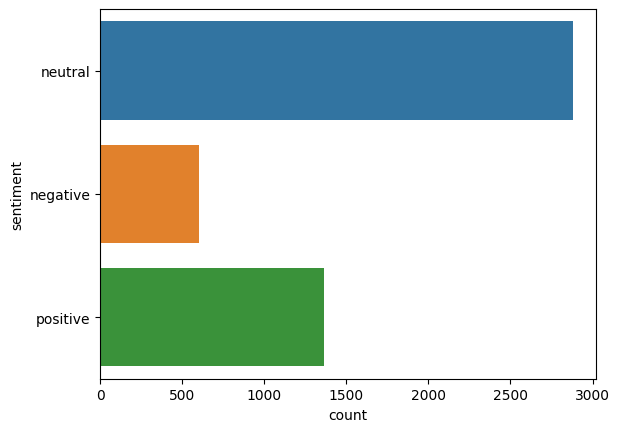

In [40]:
sns.countplot(y='sentiment', data=df)

In [47]:
import requests
import nltk
from bs4 import BeautifulSoup
import random
import os
from textblob import TextBlob

In [104]:
def get_article(link):
    r=requests.get(link)
    r.encoding='utf-8'
    html=r.text
    soup=BeautifulSoup(html)
    text=soup.get_text()
    clean_text=text.replace('\n',' ').replace('\t', ' ').replace("'"," ").replace("\\"," ").replace("★"," ").replace("  "," ")
    final_text=''.join([c for c in clean_text if c!="'"])
#     final_text=''.join(clean_text.split(' '))
    return final_text[:5000]

In [106]:
get_article(df3['URL'][6])

'MostViewedBusinessNewsArticles,TopNewsArticles|TheEconomicTimesBenchmarksNifty17,891.95-226.35NSEGainer-LargeCapTVSMotor1,037.9054.05FEATUREDFUNDSProInvestingbyAdityaBirlaSunLifeMutualFundInvestNowFEATUREDFUNDSCanaraRobecoEquityHybridFundDirect-Growth5YReturn11.69%InvestNowFEATUREDFUNDSCanaraRobecoEmergingEquitiesFundDirect-Grow..5YReturn11.37%InvestNowMarketWatchEnglishEditionEnglishEditionहिन्दीગુજરાતીमराठीবাংলাಕನ್ನಡമലയാളംதமிழ்తెలుగు|26January,2023,09:33AMIST|TodaysPaperSubscribeSignInRepublicDayOfferisHere!Search+HomeETPrimeMarketsNewsIndustryRisePoliticsWealthMFTechJobsOpinionNRIPanacheETNOWMoreYouarehere:ETHome»\xa0404page404page404ERRORYoucansearchEconomicTimes.comforsimilarcontent,browseourmostreadarticles,orgotoourHomePageLatestNewsMostReadMostSharedMostCommentedNewslettersMostViewedBusinessNewsLastupdatedon26Jan,202309:33AMRefreshSensexcrashes774points;investorswealtherodesbyRs3.66lakhcrore25Jan,202309:42AMIST“Indianequitieswitnessedsignificantsell-offasthemarketappearedappre

'http://economictimes.indiatimes.com/markets/stocks/news/wall-st-flat-as-banks-discretionary-stocks-fall-tech-rises/articleshow/56358998.cms'

'<!DOCTYPE html><html class="no-js" lang="en"><head><META http-equiv="Content-Type" content="text/html; charset=UTF-8"><script>\n\t\t            var msid = \'56363833\', isAdaptive = \'1\', isPremium = \'\', art_hostId = 153;\n\t\t        </script><script>\n\t\t            var arrArticleList = [97268104,97258763,97179650,97175630,97171381,97165935,97142351,97138291,97117417,97112814];\n\t\t            var arrArticleData = [];\n\t\t            try {\n\t\t                arrArticleData = [\n                        {msid: 97268104,title: `India may peg nominal GDP growth at about 11% in Budget 2023`, url: \'/news/economy/indicators/india-may-peg-nominal-gdp-growth-at-about-11-in-budget-2023/articleshow/97268104.cms\', img: 97268104},\n                        {msid: 97258763,title: `Business confidence recovers from lows: NCAER`, url: \'/news/economy/indicators/business-confidence-recovers-from-lows-ncaer/articleshow/97258763.cms\', img: 97258763},\n                        {msid: 97179650,
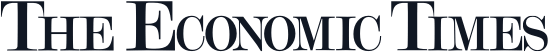

In [53]:
html=r.text
html

In [54]:
soup = BeautifulSoup(html)

In [55]:
text=soup.get_text()

In [56]:
text

'Arun Jaitley: Eliminating shadow economy to have positive impact on GDP: Arun Jaitley - The Economic Times  Benchmarks Nifty17,891.95-226.35NSE Gainer-Large Cap TVS Motor1,037.9054.05FEATURED FUNDSPro Investing by Aditya Birla Sun Life Mutual FundInvest NowFEATURED FUNDS★★★★★Canara Robeco Emerging Equities Fund Direct-Grow..5Y Return11.36 %\n                Invest NowFEATURED FUNDS★★★★★Canara Robeco Equity Hybrid Fund Direct-Growth5Y Return11.86 %\n                Invest NowMarket WatchNewsEnglish EditionEnglish Editionहिन्दीગુજરાતીमराठीবাংলাಕನ್ನಡമലയാളംதமிழ்తెలుగు | Today\'s PaperSubscribeSign InRepublic Day Offer is Here!Search+HomeETPrimeMarketsNewsIndustryRisePoliticsWealthMFTechJobsOpinionNRIPanacheET NOWMoreIndiaDecodedWeb StoriesMorning Brief PodcastNewsblogsEconomyAgricultureFinanceForeign TradeIndicatorsInfrastructurePolicyIndustryPoliticsCompanyCorporate TrendsDefenceNationalInternationalIndustryMoreInternationalCanada NewsUK NewsUS NewsUAESaudi ArabiaBusinessWorld NewsET Evo

In [57]:
df3['URL'][0]

'http://economictimes.indiatimes.com/news/economy/indicators/eliminating-shadow-economy-to-have-positive-impact-on-gdp-arun-jaitley/articleshow/56363833.cms'

In [58]:
text.find('the finance ministry statement said.')


4752

In [61]:
text[:4752]

'Arun Jaitley: Eliminating shadow economy to have positive impact on GDP: Arun Jaitley - The Economic Times  Benchmarks Nifty17,891.95-226.35NSE Gainer-Large Cap TVS Motor1,037.9054.05FEATURED FUNDSPro Investing by Aditya Birla Sun Life Mutual FundInvest NowFEATURED FUNDS★★★★★Canara Robeco Emerging Equities Fund Direct-Grow..5Y Return11.36 %\n                Invest NowFEATURED FUNDS★★★★★Canara Robeco Equity Hybrid Fund Direct-Growth5Y Return11.86 %\n                Invest NowMarket WatchNewsEnglish EditionEnglish Editionहिन्दीગુજરાતીमराठीবাংলাಕನ್ನಡമലയാളംதமிழ்తెలుగు | Today\'s PaperSubscribeSign InRepublic Day Offer is Here!Search+HomeETPrimeMarketsNewsIndustryRisePoliticsWealthMFTechJobsOpinionNRIPanacheET NOWMoreIndiaDecodedWeb StoriesMorning Brief PodcastNewsblogsEconomyAgricultureFinanceForeign TradeIndicatorsInfrastructurePolicyIndustryPoliticsCompanyCorporate TrendsDefenceNationalInternationalIndustryMoreInternationalCanada NewsUK NewsUS NewsUAESaudi ArabiaBusinessWorld NewsET Evo

In [63]:
# clean_text=text.replace('\n')
text[:5000]

'Arun Jaitley: Eliminating shadow economy to have positive impact on GDP: Arun Jaitley - The Economic Times  Benchmarks Nifty17,891.95-226.35NSE Gainer-Large Cap TVS Motor1,037.9054.05FEATURED FUNDSPro Investing by Aditya Birla Sun Life Mutual FundInvest NowFEATURED FUNDS★★★★★Canara Robeco Emerging Equities Fund Direct-Grow..5Y Return11.36 %\n                Invest NowFEATURED FUNDS★★★★★Canara Robeco Equity Hybrid Fund Direct-Growth5Y Return11.86 %\n                Invest NowMarket WatchNewsEnglish EditionEnglish Editionहिन्दीગુજરાતીमराठीবাংলাಕನ್ನಡമലയാളംதமிழ்తెలుగు | Today\'s PaperSubscribeSign InRepublic Day Offer is Here!Search+HomeETPrimeMarketsNewsIndustryRisePoliticsWealthMFTechJobsOpinionNRIPanacheET NOWMoreIndiaDecodedWeb StoriesMorning Brief PodcastNewsblogsEconomyAgricultureFinanceForeign TradeIndicatorsInfrastructurePolicyIndustryPoliticsCompanyCorporate TrendsDefenceNationalInternationalIndustryMoreInternationalCanada NewsUK NewsUS NewsUAESaudi ArabiaBusinessWorld NewsET Evo

In [67]:
clean_text= text[:5000].replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

In [68]:
clean_text

'Arun Jaitley: Eliminating shadow economy to have positive impact on GDP: Arun Jaitley - The Economic Times  Benchmarks Nifty17,891.95-226.35NSE Gainer-Large Cap TVS Motor1,037.9054.05FEATURED FUNDSPro Investing by Aditya Birla Sun Life Mutual FundInvest NowFEATURED FUNDS★★★★★Canara Robeco Emerging Equities Fund Direct-Grow..5Y Return11.36 %                 Invest NowFEATURED FUNDS★★★★★Canara Robeco Equity Hybrid Fund Direct-Growth5Y Return11.86 %                 Invest NowMarket WatchNewsEnglish EditionEnglish Editionहिन्दीગુજરાતીमराठीবাংলাಕನ್ನಡമലയാളംதமிழ்తెలుగు | Todays PaperSubscribeSign InRepublic Day Offer is Here!Search+HomeETPrimeMarketsNewsIndustryRisePoliticsWealthMFTechJobsOpinionNRIPanacheET NOWMoreIndiaDecodedWeb StoriesMorning Brief PodcastNewsblogsEconomyAgricultureFinanceForeign TradeIndicatorsInfrastructurePolicyIndustryPoliticsCompanyCorporate TrendsDefenceNationalInternationalIndustryMoreInternationalCanada NewsUK NewsUS NewsUAESaudi ArabiaBusinessWorld NewsET EvokeEl

In [ ]:
def get_article(link):
    